<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#MultinomialNB" data-toc-modified-id="MultinomialNB-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MultinomialNB</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Тестовая выборка</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import spacy
import nltk
import re 

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/toxic_comments.csv')
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [4]:
df.duplicated().sum()

0

Объявляю функцию для очистки и лемматизации текстов 'lemm'

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
def lemm(text):
    text = text.lower()
    lemm_text = nlp(text)
    lt = ' '.join([token.lemma_ for token in lemm_text])
    clean_text = re.sub(r'[^a-zA-Z]', ' ', lt)
    return clean_text

In [180]:
%%time

df['text_lem'] = df['text'].apply(lemm)

CPU times: user 40min 13s, sys: 1.53 s, total: 40min 15s
Wall time: 40min 19s


In [198]:
#Для удобства сохранила и импортировала в csv

In [7]:
#df.to_csv('df_lemm')

In [7]:
dfl = pd.read_csv('df_lemm')

In [8]:
dfl = dfl.drop(columns='Unnamed: 0')
dfl

,text,toxic,text_lem
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edit make under my usern...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour I be s...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man I be really not try to edit war it...
3,"""\nMore\nI can't make any real suggestions on ...",0,more I can not make any real suggestion ...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you rememb...
...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,and for the second time of asking ...
159567,You should be ashamed of yourself \n\nThat is ...,0,you should be ashamed of yourself that be a...
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,spitzer umm there s no actual article for...
159569,And it looks like it was actually you who put ...,0,and it look like it be actually you who put on...


In [9]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      159571 non-null  object
 1   toxic     159571 non-null  int64 
 2   text_lem  159571 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


0    143346
1     16225
Name: toxic, dtype: int64


<AxesSubplot:xlabel='toxic', ylabel='count'>

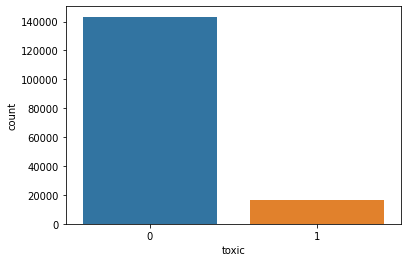

In [10]:
print(dfl['toxic'].value_counts())
sns.countplot(x='toxic', data=dfl)

Довольно сильный дисбаланс классов

### Подготовка данных к обучению

In [11]:
features = dfl['text_lem']
target = dfl['toxic']

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.15, random_state=42, stratify = target)

## Обучение

Так как в данных дисбаланс классов при обучении модели буду передавать параметр class_weight='balanced'

### RandomForestClassifier

In [13]:
rf = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('rf', RandomForestClassifier(class_weight='balanced')),
                    ])

rf_param = { 'vect__max_df': (0.5, 0.75, 1.0),
            'rf__n_estimators': range(10, 40, 10),
            'rf__max_depth': range(4, 8, 2),
            }

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
%%time

rf_grid = GridSearchCV(rf, rf_param, scoring='f1', cv=cv)
rf_grid.fit(features_train, target_train)

print('F1 =', rf_grid.best_score_)
print('при параметрах:', rf_grid.best_params_)

F1 = 0.3249125530164292
при параметрах: {'rf__max_depth': 6, 'rf__n_estimators': 30, 'vect__max_df': 0.75}
CPU times: user 9min 32s, sys: 4.15 s, total: 9min 36s
Wall time: 9min 36s


### SGDClassifier

In [30]:
sgd = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('sgd', SGDClassifier(class_weight='balanced'))
                    ])

sgd_param = { 'vect__max_df': (0.5, 0.75, 1.0),
            'sgd__max_iter': (1000,),
            'sgd__alpha': (0.00001, 0.000001)
            }

In [31]:
%%time

sgd_grid = GridSearchCV(sgd, sgd_param, scoring='f1', cv=cv)
sgd_grid.fit(features_train, target_train)

print('F1 =', sgd_grid.best_score_)
print('при параметрах:', sgd_grid.best_params_)

F1 = 0.7453610091296216
при параметрах: {'sgd__alpha': 1e-05, 'sgd__max_iter': 1000, 'vect__max_df': 0.5}
CPU times: user 3min 19s, sys: 4.17 s, total: 3min 24s
Wall time: 3min 24s


### MultinomialNB

In [17]:
mnb = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('mnb', MultinomialNB())
                    ])
mnb_param = { 'vect__max_df': (0.5, 0.75, 1.0),
            'mnb__alpha': (1, 0.1, 0.01, 0.001)
            }

In [18]:
%%time

mnb_grid = GridSearchCV(mnb, mnb_param, scoring='f1', cv=cv)
mnb_grid.fit(features_train, target_train)

print('F1 =', mnb_grid.best_score_)
print('при параметрах:', mnb_grid.best_params_)

F1 = 0.6717607933737408
при параметрах: {'mnb__alpha': 0.01, 'vect__max_df': 0.5}
CPU times: user 5min 57s, sys: 2.08 s, total: 5min 59s
Wall time: 5min 59s


### LogisticRegression

In [19]:
%%time

lr = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('lr', LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear', max_iter=100))
              ])

lr_param = { 'vect__max_df': (0.5, 0.75, 1.0),
            'lr__C': (0.1, 1, 10)}

lr_grid = GridSearchCV(lr, lr_param, scoring='f1', cv=cv)
lr_grid.fit(features_train, target_train)

print('F1 =', lr_grid.best_score_)
print('при параметрах:', lr_grid.best_params_)

F1 = 0.7641924338423822
при параметрах: {'lr__C': 10, 'vect__max_df': 0.5}
CPU times: user 8min 47s, sys: 6min 49s, total: 15min 37s
Wall time: 15min 38s


таким образом, модель показавшая лучшую оценку f1 на тренировочной выборке - LogisticRegression

### Тестовая выборка

на тестовой выборке проверю SGDClassifier и LogisticRegression

In [28]:
%%time

test_m = Pipeline([('vect', CountVectorizer(max_df=1.0, stop_words = 'english')),
                    ('tfidf', TfidfTransformer()),
                    ('sgd', SGDClassifier(alpha=1e-05, max_iter=1000))
                    ])

test_m.fit(features_train, target_train)
predict = test_m.predict(features_test)
print('F1 =', f1_score(target_test, predict))

F1 = 0.7645665561345334
CPU times: user 7.03 s, sys: 131 ms, total: 7.16 s
Wall time: 7.16 s


In [29]:
%%time

test_lr = Pipeline([('vect', CountVectorizer(max_df=0.5)),
                    ('tfidf', TfidfTransformer()),
                    ('lr', LogisticRegression(C=10, fit_intercept=True, class_weight='balanced', random_state=42, solver='liblinear', max_iter=100))
                    ])

test_lr.fit(features_train, target_train)
predict_lr = test_lr.predict(features_test)
print('F1 =', f1_score(target_test, predict_lr))

F1 = 0.7694046721929164
CPU times: user 20.7 s, sys: 16 s, total: 36.7 s
Wall time: 36.8 s


- F1 на обучающей выборке: 0.7641924338423822
- F1 на тестовой выборке: 0.7694046721929164

## Выводы

Для поиска токсичных комментариев были построенны и рассмотрены 4 модели. Лучшая по метрике качества F1 оказалась модель линейной классификации SGDClassifier. На тестовой выборке показан F1 = 0.7694046721929164.

Спасибо за внимание!🌻